In [1]:
import warnings
from EDA_phys_activity import *


warnings.filterwarnings("ignore")

In [2]:
df1, df2 = load_data()

In [4]:
df1.info()
print('=========================================')
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2613000 entries, 2019-08-11 12:25:00 to 2019-08-14 12:59:59.900000
Data columns (total 3 columns):
x    float64
y    float64
z    float64
dtypes: float64(3)
memory usage: 79.7 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2712000 entries, 2019-09-04 10:20:00 to 2019-09-07 13:39:59.900000
Data columns (total 3 columns):
x    float64
y    float64
z    float64
dtypes: float64(3)
memory usage: 82.8 MB


In [5]:
df1.head()

,x,y,z
dt,,,
2019-08-11 12:25:00.000,-0.425000,0.493750,1.006250
2019-08-11 12:25:00.100,-0.354687,0.420312,0.307812
2019-08-11 12:25:00.200,-0.640625,0.467014,0.375000
2019-08-11 12:25:00.300,-0.626563,0.537500,0.456250
2019-08-11 12:25:00.400,-0.678125,0.970313,0.539062


In [6]:
df2.head()

,x,y,z
dt,,,
2019-09-04 10:20:00.000,0.522569,-0.880208,0.065972
2019-09-04 10:20:00.100,0.550000,-1.471875,-0.114062
2019-09-04 10:20:00.200,0.328125,-1.875000,0.024306
2019-09-04 10:20:00.300,0.234375,-1.415625,-0.067187
2019-09-04 10:20:00.400,0.037500,-0.801562,-0.100000


In [7]:
print('Missing values in df1: ', df1.isna().values.sum())
print('Missing values in df2: ', df2.isna().values.sum())

print('Null values in df1: ', df1.isnull().values.sum())
print('Null values in df2: ', df2.isnull().values.sum())

Missing values in df1:  0
Missing values in df2:  0
Null values in df1:  0
Null values in df2:  0


In [8]:
df1.describe()

,x,y,z
count,2.613000e+06,2.613000e+06,2.613000e+06
mean,3.541634e-01,-7.934960e-02,1.380135e-01
std,5.030142e-01,5.495947e-01,5.618456e-01
min,-5.078125e+00,-8.000000e+00,-4.739063e+00
25%,-1.562500e-02,-5.312500e-01,-2.015625e-01
50%,4.357639e-01,-3.437500e-02,1.906250e-01
75%,7.968750e-01,4.184028e-01,5.953125e-01
max,6.367188e+00,4.442708e+00,4.024306e+00


In [9]:
df2.describe()

,x,y,z
count,2.712000e+06,2.712000e+06,2.712000e+06
mean,3.195581e-01,1.063686e-02,3.171709e-01
std,4.949364e-01,5.405249e-01,4.857384e-01
min,-3.772569e+00,-3.720486e+00,-5.012153e+00
25%,1.562500e-02,-3.500000e-01,-1.875000e-02
50%,3.750000e-01,6.093750e-02,4.062500e-01
75%,7.343750e-01,4.062500e-01,7.406250e-01
max,4.112500e+00,2.232813e+00,2.943750e+00


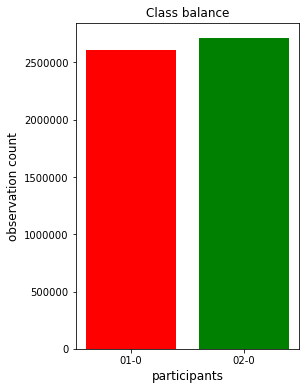

In [10]:
class_balance_info(df1, df2)

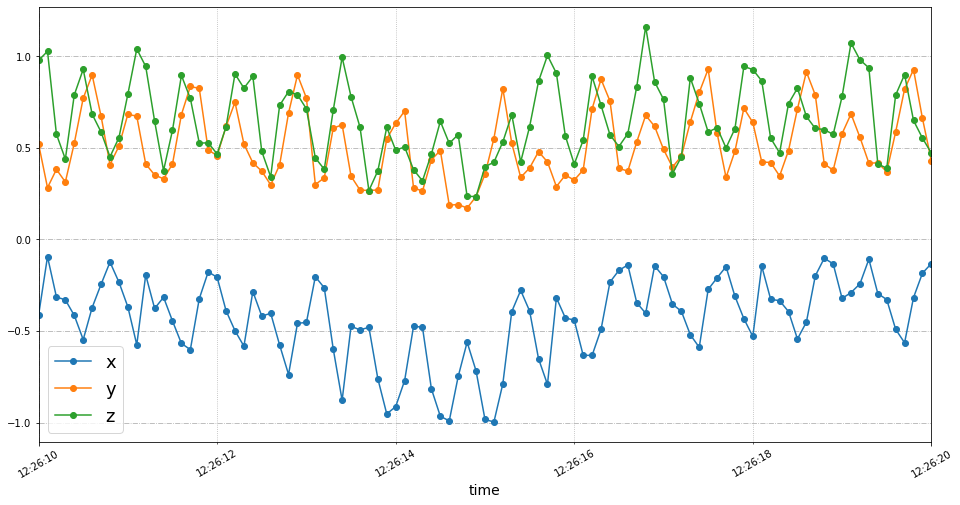

In [5]:
show_data_detail(df1, 700, 801)

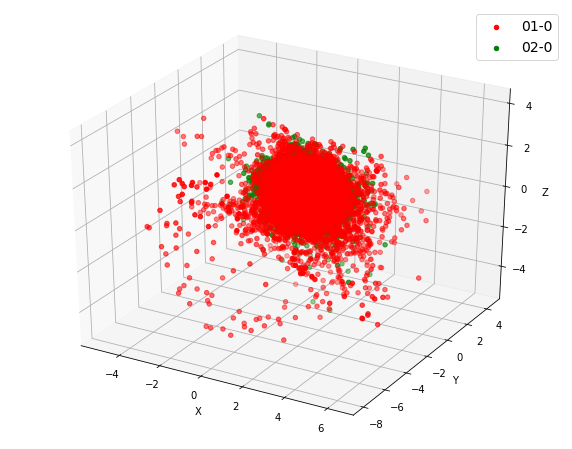

In [6]:
show_data_in_3d(df1, df2)

Уже из общей 3d-картины видно, что показания участника 02-0 более "кучные", что говорит об относительно однородной и менее изменчивой активности на протяжении времени наблюдения. Далее это можно видеть в проекциях на оси.

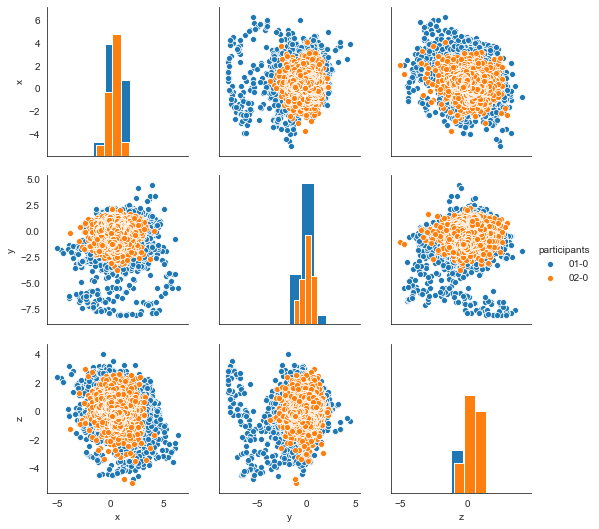

In [11]:
show_pairplot(df1, df2)

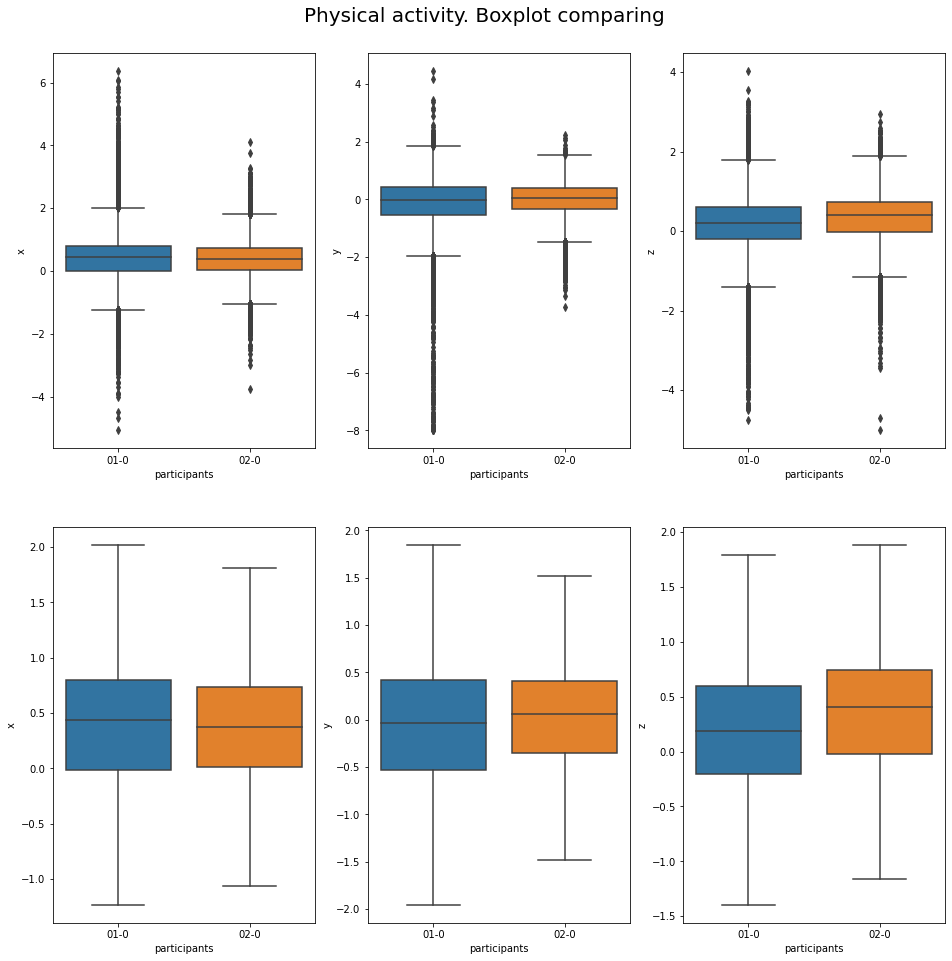

In [14]:
show_boxplots(df1, df2)

В первом ряду графиков представлены boxplot с выбросами, во втором - без выбросов. Диапазон значений выбросов участника 01-0 заметно шире, межквартильный интервал и размах "усов" также более широкие (особенно в осях X и Y). Это подтверждает, что характер активности 01-0 более изменчивый в сравнении с 02-0.

In [6]:
print('01-0 observation start ------ {}, \n01-0 observation end -------- {}'.format(df1.index[0], df1.index[-1]))
print('--------------------------------------------------------')
print('02-0 observation start ------ {}, \n02-0 observation end -------- {}'.format(df2.index[0], df2.index[-1]))

01-0 observation start ------ 2019-08-11 12:25:00, 
01-0 observation end -------- 2019-08-14 12:59:59.900000
--------------------------------------
02-0 observation start ------ 2019-09-04 10:20:00, 
02-0 observation end -------- 2019-09-07 13:39:59.900000


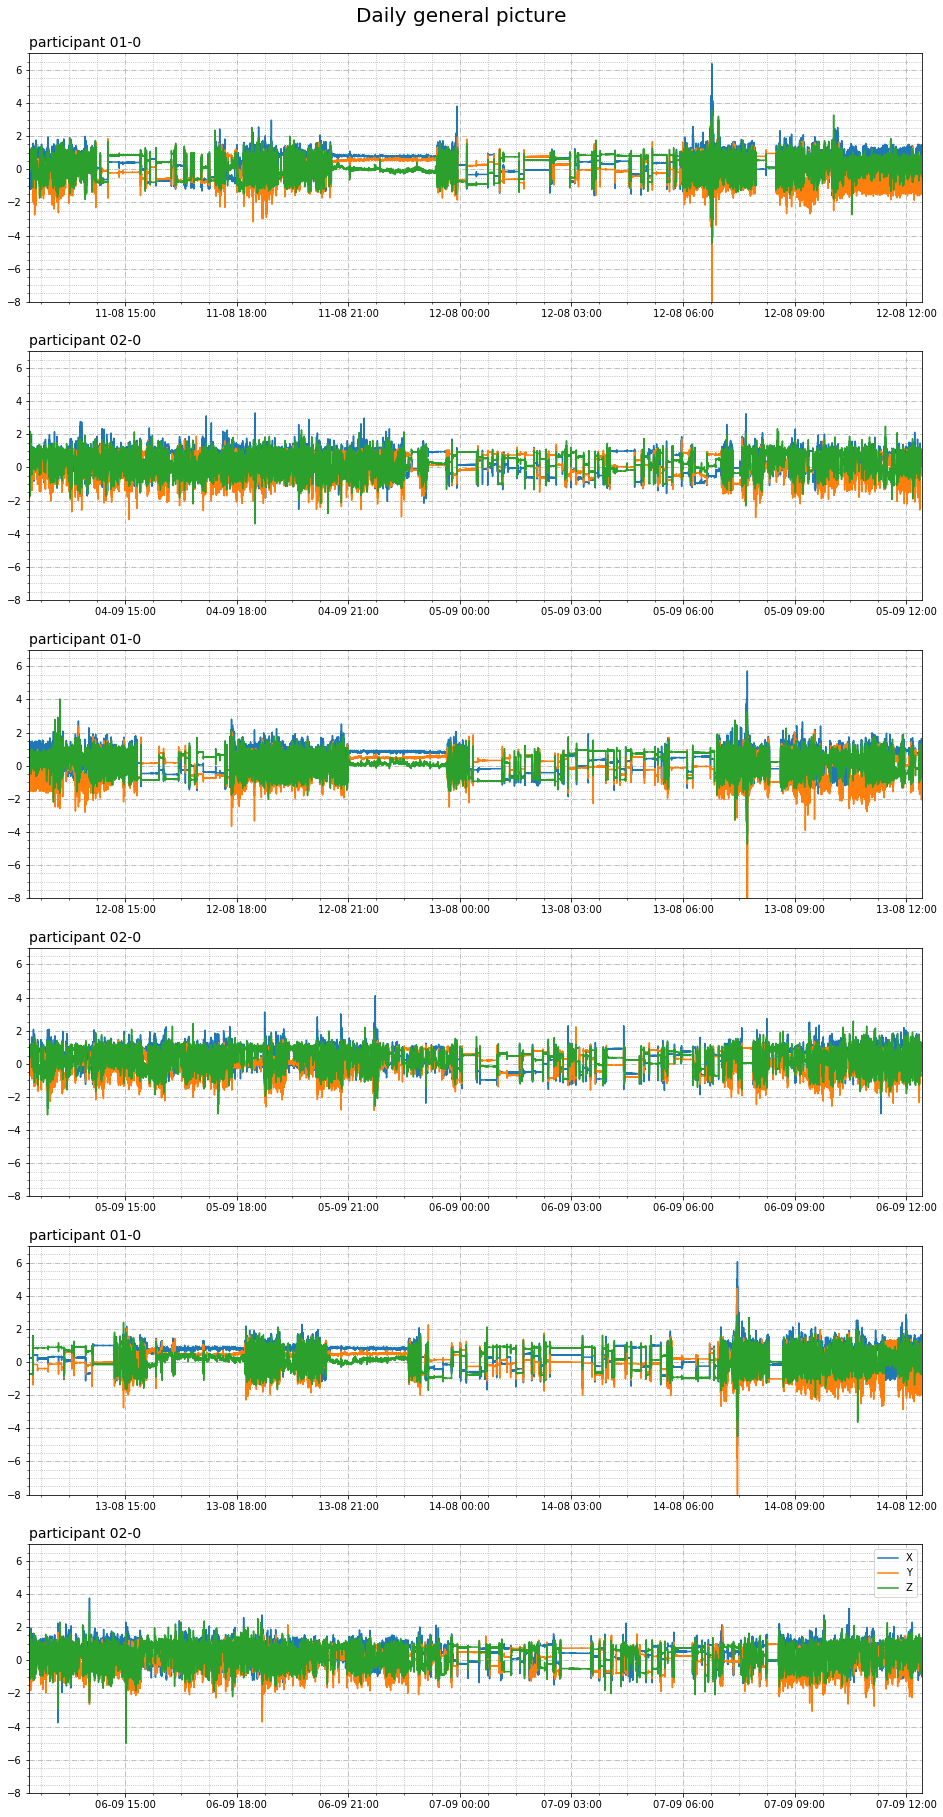

In [7]:
"""
Поскольку временной диапазон наблюдения 02-0 чуть шире, его можно сузить до диапазона 01-0 
для удобства ежедневного почасового сравнения активности участников.
""" 
show_daily_phys_activity(df1, df2)

Общая ежедневная картина активности обоих участников показывает следующее.\
**Участник 01-0**. Дневной период характеризуется сочетанием повышенной и низкой активности (дневной сон, отдых, спокойный вид занятий, лечебные процедуры и т.д.). Примечательно, что "спокойные" участки бодрствования находятся примерно в одних и тех же временных диапазонах: 15:00 -- 18:00, 21:00 -- 00:00. Причем отрезок 15:00-18:00 и ночные часы схожи по характеру, вполне возможно это дневной сон. Примерные часы сна: 00:00 -- 06:45-08:00.\
**Участник 02-0**. Движения более устойчивые в сравнении с 01-0 и в дневное время практически без состояния покоя. Некоторые промежутки относительного покоя наблюдаются лишь в период сна. Дневная активность, в целом, однообразная. Примерные часы сна: 23:30-00:00 -- 07:30-08:00.

У второго участника двигательная активность в период сна несколько выраженнее, чем у первого.\
У первого участника имеется ежедневный интервал со значительными выбросами в утренние часы. Рассмотрим подробнее. 

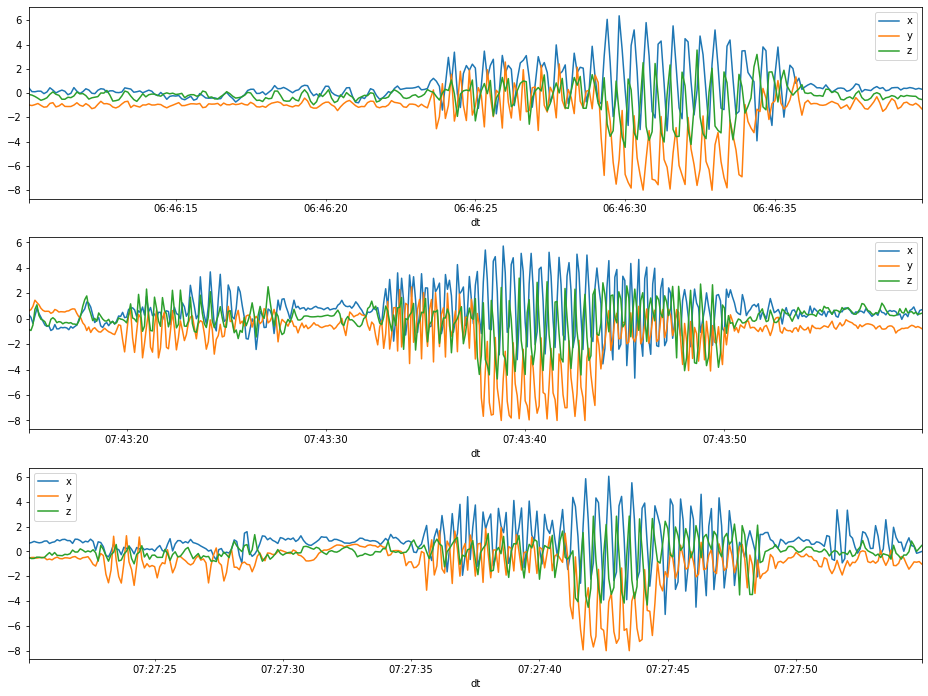

In [22]:
show_remarkable_fliers(df1)

Такая резкая двигательная активность возникает через 40-45 минут после пробуждения, длится примерно 15 секунд и, возможно, связана с определенным утренним действием (мини-упражнения, процедуры и пр.), либо неврологическими особенностями.